Code, which I sent to ChatGPT for optimization.

In [21]:
"""
Eternas game
"""
import random


def check_combination(board: list[list], hor_index: int, ver_index: int, hor: int, ver: int):
    """
    (list, int, int, int, int) -> list

    Checks for winning combinations on the board.
    Returns a list with winning combination indexes.

    >>> check_combination([['w', 'g', 'g', 'w'], [0, 0, 0, 0], [0, 'g', 'w', 'g'], \
['g', 'w', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 0, 'w'], [0, 0, 0, 0], \
[0, 0, 'w', 'w'], ['w', 'g', 'w', 'g'], [0, 0, 0, 'w'], [0, 0, 0, 'g'], [0, 0, 'g', 'w'], \
[0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 0, 'g']], 0, 0, 4, 1)
    []
    >>> check_combination(([[0, 0, 0, 'w'], [0, 'g', 'g', 'w'], [0, 0, 'w', 'w'], \
[0, 'g', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 'w', 'g'], [0, 0, 0, 'g'], [0, 0, 0, 0], \
[0, 'w', 'w', 'w'], ['g', 'w', 'w', 'g'], [0, 0, 0, 0], [0, 0, 0, 'g'], [0, 0, 'g', 'g'], \
['g', 'g', 'w', 'w'], [0, 0, 'g', 'w']]), 0, 3, 4, 1)
    [(3, 0), (3, 1), (3, 2), (3, 3)]
    """
    item = board[hor_index][ver_index]
    if item == 0:
        return []
    combination = []
    for i in range(hor_index, hor_index+hor):
        for j in range(ver_index, ver_index+ver):
            if board[i % len(board)][j] != item:
                return []
            combination.append((j, i % len(board)))
    return combination
def check_diagonal_combination(board: list[list], hor_index: int):
    """
    (list, int) -> list

    Checks for winning diagonal combinations on the board.
    Returns a list with winning combination indexes.

    >>> check_diagonal_combination([['w', 'g', 'g', 'w'], [0, 0, 0, 0], [0, 'g', 'w', 'g'], \
['g', 'w', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 0, 'w'], [0, 0, 0, 0], \
[0, 0, 'w', 'w'], ['w', 'g', 'w', 'g'], [0, 0, 0, 'w'], [0, 0, 0, 'g'], [0, 0, 'g', 'w'], \
[0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 0, 'g']], 0)
    []
    >>> check_diagonal_combination([['w', 'g', 'g', 'w'], [0, 'w', 'g', 'g'], [0, 'g', 'w', 'g'], \
['g', 'w', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 0, 'w'], [0, 0, 0, 0], \
[0, 0, 'w', 'w'], ['w', 'g', 'w', 'g'], [0, 0, 0, 'w'], [0, 0, 0, 'g'], [0, 0, 'g', 'w'], \
[0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 0, 'g']], 0)
    [(0, 0), (1, 1), (2, 2), (3, 3)]
    """
    item = board[hor_index][0]
    if item == 0:
        return []
    combination = []
    for i in range(0, 4):
        if board[(hor_index+i) % len(board)][i] != item:
            return []
        combination.append((i, (hor_index+i) % len(board)))
    return combination
def check_reverse_diagonal_combination(board: list[list], hor_index: int):
    """
    (list, int) -> list

    Checks for winning reverse diagonal combinations on the board.
    Returns a list with winning combination indexes.
    >>> check_reverse_diagonal_combination([['w', 'g', 'g', 'w'], [0, 0, 0, 0], \
[0, 'g', 'w', 'g'], ['g', 'w', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 0, 'w'], \
[0, 0, 0, 0], [0, 0, 'w', 'w'], ['w', 'g', 'w', 'g'], [0, 0, 0, 'w'], [0, 0, 0, 'g'],\
[0, 0, 'g', 'w'], [0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 0, 'g']], 0)
    []
    >>> check_reverse_diagonal_combination([['g', 'g', 'g', 'w'], [0, 'g', 'w', 'g'], \
[0, 'w', 'w', 'g'], ['w', 'g', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 0, 'w'], \
[0, 0, 0, 0], [0, 0, 'w', 'w'], ['w', 'g', 'w', 'g'], [0, 0, 0, 'w'], [0, 0, 0, 'g'],\
[0, 0, 'g', 'w'], [0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 0, 'g']], 0)
    [(0, 3), (1, 2), (2, 1), (3, 0)]
    """
    item = board[hor_index][3]
    if item == 0:
        return []
    combination = []
    for i in range(3, -1, -1):
        if board[(hor_index+i) % len(board)][3-i] != item:
            return []
        if hor_index+i >= 0:
            combination.append((3-i, hor_index+i))
        else:
            combination.append((3-i, (16 + i - hor_index) % len(board)))
    return combination
def winning_combination(board: list[list]) -> bool:
    """
    (list) -> bool
    Checks for winning combinations on the board.
    Returns a bool value of True and all winning positions if there is winning combination
    or False if not.
    >>> winning_combination([['w', 'g', 'g', 'w'], [0, 0, 0, 0], [0, 'g', 'w', 'g'], \
['g', 'w', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 0, 'w'], [0, 0, 0, 0], \
[0, 0, 'w', 'w'], ['w', 'g', 'w', 'g'], [0, 0, 0, 'w'], [0, 0, 0, 'g'], [0, 0, 'g', 'w'], \
[0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 0, 'g']])
    False
    >>> winning_combination([[0, 0, 0, 'w'], [0, 'g', 'g', 'w'], [0, 0, 'w', 'w'], \
[0, 'g', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 'w', 'g'], [0, 0, 0, 'g'], [0, 0, 0, 0], \
[0, 'w', 'w', 'w'], ['g', 'w', 'w', 'g'], [0, 0, 0, 0], [0, 0, 0, 'g'], [0, 0, 'g', 'g'], \
['g', 'g', 'w', 'w'], [0, 0, 'g', 'w']])
    (True, [[(3, 0), (3, 1), (3, 2), (3, 3)], [(3, 14), (3, 15), (3, 0), (3, 1)], \
[(3, 15), (3, 0), (3, 1), (3, 2)]])
    
    """
    winning_combinations = []
    for i in range(0, 16):
        for j in range(0, 4):
            combination = check_combination(board, i, j, 4, 1)
            if combination:
                winning_combinations.append(combination)
        combination = check_combination(board, i, 0, 1, 4)
        if combination:
            winning_combinations.append(combination)
        combination = check_diagonal_combination(board, i)
        if combination:
            winning_combinations.append(combination)
        combination = check_reverse_diagonal_combination(board, i)
        if combination:
            winning_combinations.append(combination)
    if len(winning_combinations) == 0:
        return False
    return True, winning_combinations

def board_generation() -> list[list]:
    """
    Generates a game board of 16 x 4 size, i.e. two dimensional list (array) of
    'g's, 'w's and '0's  that is used for the game.

    ### 16 x 4 | g - green, w - white, 0 - whitespace
        e.g. [[0, 0, 0, 0], [0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 'g', 'g'],
          [0, 'w', 'w', 'w'], [0, 0, 'w', 'g'], [0, 0, 0, 'g'], [0, 0, 'g', 'w'],
          [0, 'g', 'g', 'w'], [0, 0, 0, 0], ['w', 'g', 'w', 'w'], [0, 0, 0, 'g'],
          [0, 0, 0, 'g'], ['w', 'g', 'g', 'w'], [0, 'w', 'w', 'w'], [0, 0, 'g', 'w']]

    """
    board = []
    i = 0
    while i < 16:
        board.insert(0, [0, 0, 0, 0])
        i += 1

    balls_count = random.randint(0, 32)
    ball_color = 'w'
    while balls_count != 0:
        while True:
            pos = random.randint(0, 15)
            ball_pos = 3
            is_success = False
            while ball_pos != 0:
                if board[pos][ball_pos] == 0:
                    board[pos][ball_pos] = ball_color
                    is_success = True
                    break
                ball_pos -= 1

            if is_success:
                break

        balls_count -= 1
        if ball_color == 'w':
            ball_color = 'g'
        else:
            ball_color = 'w'

        if winning_combination(board):
            break
    return board

On my first request to send me optimized code (I provide whole code) Gemini send me this message

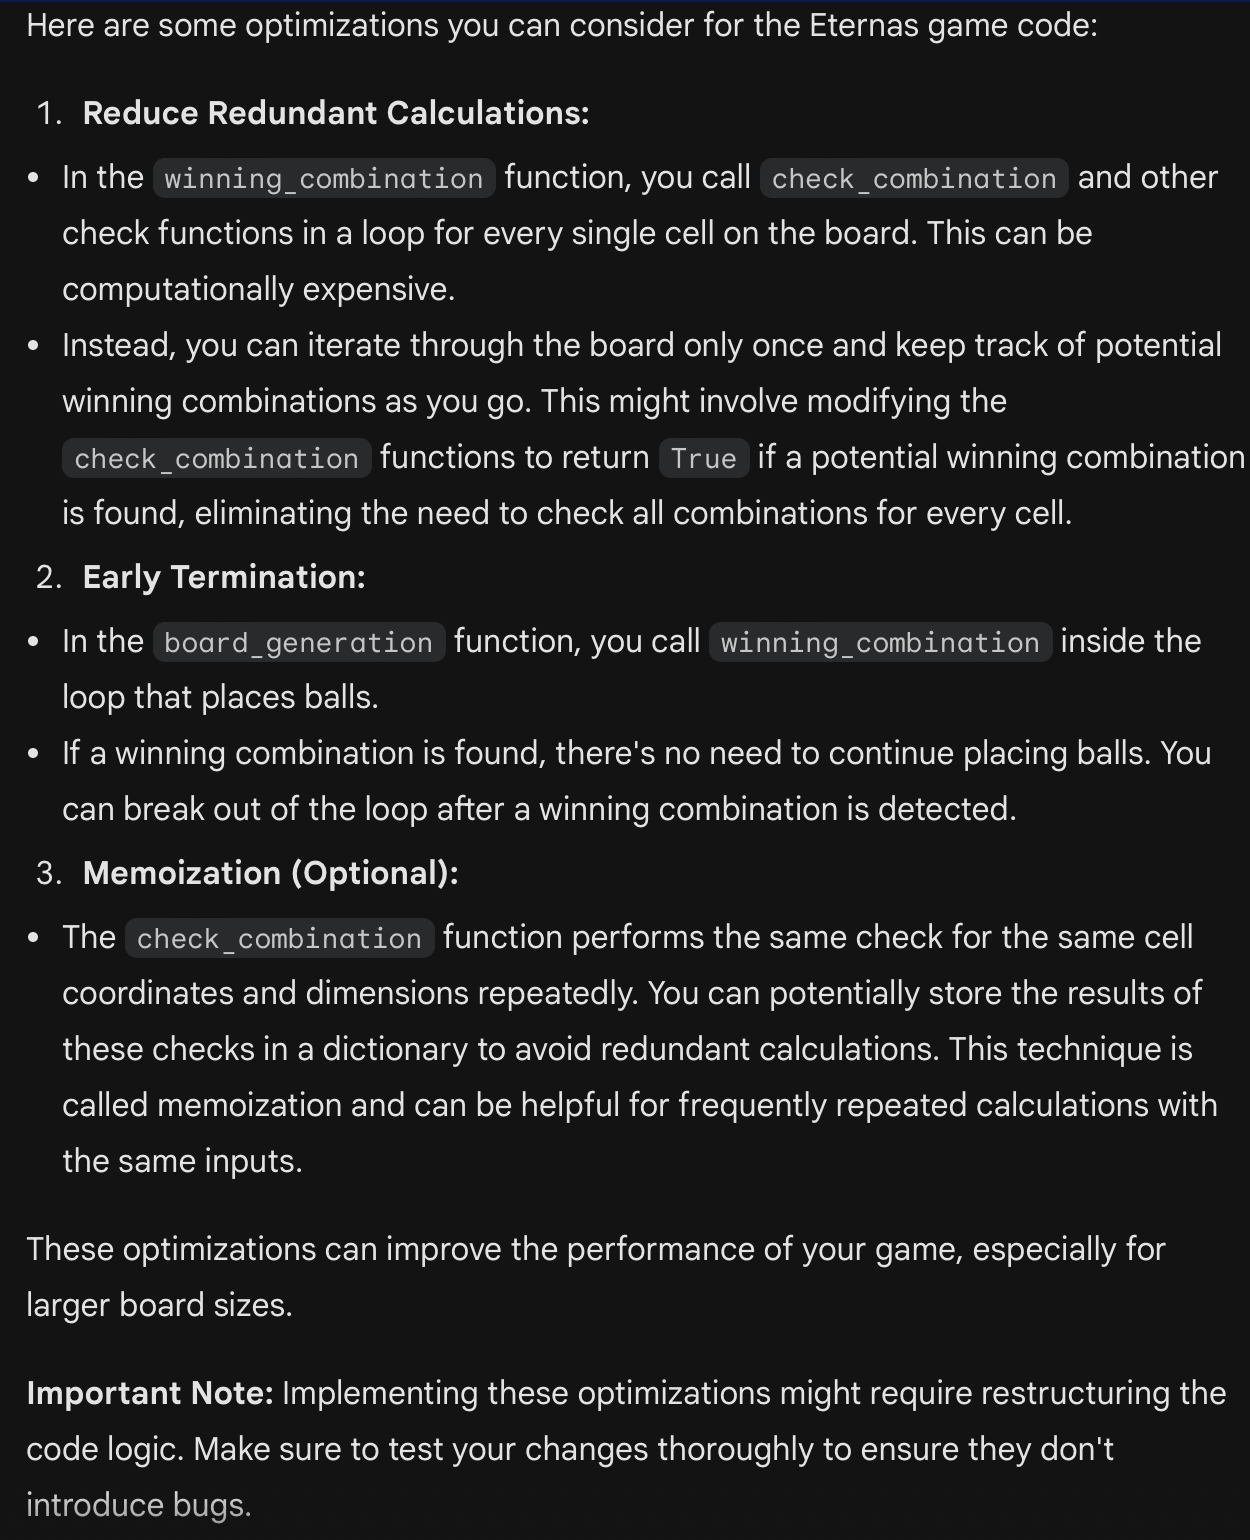

But I ask to send me code and I get this functions

In [22]:
import random


def check_combination_gemini(board: list[list], hor_index: int, ver_index: int, hor: int, ver: int) -> bool:
    """
    (list, int, int, int, int) -> bool

    Checks for potential winning combinations on the board.
    Returns True if a potential winning combination is found, False otherwise.

    >>> check_combination([['w', 'g', 'g', 'w'], [0, 0, 0, 0], [0, 'g', 'w', 'g'], \
['g', 'w', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 0, 'w'], [0, 0, 0, 0], \
[0, 0, 'w', 'w'], ['w', 'g', 'w', 'g'], [0, 0, 0, 'w'], [0, 0, 0, 'g'], [0, 0, 'g', 'w'], \
[0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 0, 'g']], 0, 0, 4, 1)
    False
    >>> check_combination(([[0, 0, 0, 'w'], [0, 'g', 'g', 'w'], [0, 0, 'w', 'w'], \
[0, 'g', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 'w', 'g'], [0, 0, 0, 'g'], [0, 0, 0, 0], \
[0, 'w', 'w', 'w'], ['g', 'w', 'w', 'g'], [0, 0, 0, 0], [0, 0, 0, 'g'], [0, 0, 'g', 'g'], \
['g', 'g', 'w', 'w'], [0, 0, 'g', 'w']]), 0, 3, 4, 1)
    True
    """
    item = board[hor_index][ver_index]
    if item == 0:
        return False
    for i in range(hor_index, hor_index+hor):
        for j in range(ver_index, ver_index+ver):
            if board[i % len(board)][j] != item:
                return False
    return True


After me question if it is everything that can be optimized, Gemini send me again a message, but after asking for code, it provides me this

In [23]:
import random

def check_diagonal_combination_gemini(board: list[list], hor_index: int) -> bool:
    """
    (list, int) -> bool

    Checks for potential winning diagonal combinations on the board.
    Returns True if a potential winning combination is found, False otherwise.
    """
    item = board[hor_index][0]
    if item == 0:
        return False
    for i in range(0, 4):
        if board[(hor_index+i) % len(board)][i] != item:
            return False
    return True

def check_reverse_diagonal_combination_gemini(board: list[list], hor_index: int) -> bool:
    """
    (list, int) -> bool

    Checks for potential winning reverse diagonal combinations on the board.
    Returns True if a potential winning combination is found, False otherwise.
    """
    item = board[hor_index][3]
    if item == 0:
        return False
    for i in range(3, -1, -1):
        if board[(hor_index+i) % len(board)][3-i] != item:
            return False
    return True

def winning_combination_gemini(board: list[list]) -> bool:
    """
    (list) -> bool

    Checks for winning combinations on the board.
    Returns True if a winning combination is found, False otherwise.
    """
    winning_found = False
    for i in range(0, 16):
        for j in range(0, 4):
            if check_combination_gemini(board, i, j, 4, 1):
                winning_found = True
                break
        if winning_found:
            break
        if check_combination_gemini(board, i, 0, 1, 4):
            winning_found = True
            break
        if winning_found:
            break
        if check_diagonal_combination_gemini(board, i):
            winning_found = True
            break
        if winning_found:
            break
        if check_reverse_diagonal_combination_gemini(board, i):
            winning_found = True
            break
    return winning_found

def board_generation_gemini(max_balls=32) -> list[list]:
    """
    Generates a game board of 16 x 4 size with a maximum number of balls.

    Args:
        max_balls (int, optional): The maximum number of balls to place on the board. Defaults to 32.

    Returns:
        list[list]: A list representing the game board.
    """
    board = []
    for _ in range(16):
        board.append([0, 0, 0, 0])

    balls_count = random.randint(0, max_balls)
    ball_color = 'w'
    while balls_count != 0:
        while True:
            pos = random.randint(0, 15)
            ball_pos = 3
            is_success = False
            while ball_pos != 0:
                if board[pos][ball_pos] == 0:
                    board[pos][ball_pos] = ball_color
                    is_success = True
                    break
                ball_pos -= 1

            if is_success:
                break

        balls_count -= 1
        if ball_color == 'w':
            ball_color = 'g'
        else:
            ball_color = 'w'

        if winning_combination_gemini(board):
            break
    return board


And this passed almost all tests.

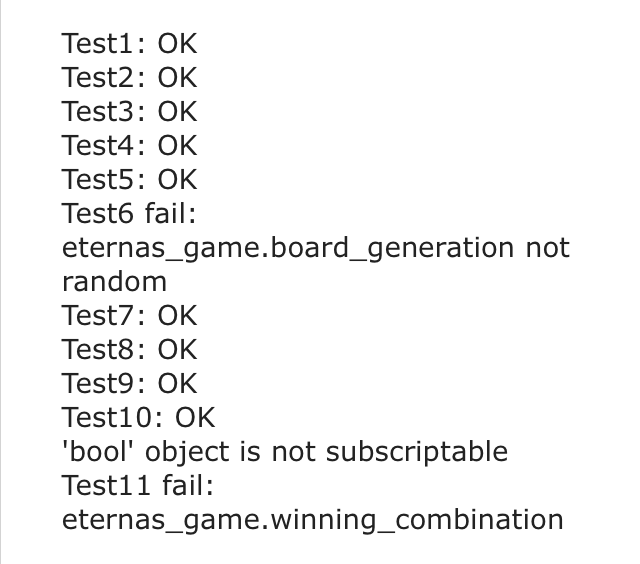

But what if I ask to optimize by function?

First optimized function that Gemini provide me:

In [24]:
import random


def check_combination_by_parts(board: list[list], hor_index: int, ver_index: int, hor: int, ver: int):
    """
    (list, int, int, int, int) -> list

    Checks for winning combinations on the board.
    Returns a list with winning combination indexes.

    >>> check_combination([['w', 'g', 'g', 'w'], [0, 0, 0, 0], [0, 'g', 'w', 'g'], \
['g', 'w', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 0, 'w'], [0, 0, 0, 0], \
[0, 0, 'w', 'w'], ['w', 'g', 'w', 'g'], [0, 0, 0, 'w'], [0, 0, 0, 'g'], [0, 0, 'g', 'w'], \
[0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 0, 'g']], 0, 0, 4, 1)
    []
    >>> check_combination(([[0, 0, 0, 'w'], [0, 'g', 'g', 'w'], [0, 0, 'w', 'w'], \
[0, 'g', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 'w', 'g'], [0, 0, 0, 'g'], [0, 0, 0, 0], \
[0, 'w', 'w', 'w'], ['g', 'w', 'w', 'g'], [0, 0, 0, 0], [0, 0, 0, 'g'], [0, 0, 'g', 'g'], \
['g', 'g', 'w', 'w'], [0, 0, 'g', 'w']]), 0, 3, 4, 1)
    [(3, 0), (3, 1), (3, 2), (3, 3)]
    """
    item = board[hor_index][ver_index]
    if item == 0:
        return []
    combination = []
    for i in range(hor_index, hor_index+hor):
        for j in range(ver_index, ver_index+ver):
            if board[i % len(board)][j] != item:
                return []
            combination.append((j, i % len(board)))
    return combination

The next one:

In [25]:
def check_diagonal_combination_by_parts(board: list[list], hor_index: int) -> bool:
  """
  (list, int) -> bool

  Checks for a potential winning diagonal combination on the board.
  Returns True if a winning combination is found, False otherwise.
  """
  item = board[hor_index][0]
  if item == 0:
    return False
  for i in range(4):
    if board[(hor_index + i) % len(board)][i] != item:
      return False
  return True


The check_reverse_diagonal_combination function:

In [26]:
def check_reverse_diagonal_combination_by_parts(board: list[list], hor_index: int) -> bool:
  """
  (list, int) -> bool

  Checks for a potential winning reverse diagonal combination on the board.
  Returns True if a winning combination is found, False otherwise.
  """
  item = board[hor_index][3]
  if item == 0:
    return False
  for i in range(4):
    row_index = (3 - i) % len(board)
    col_index = (hor_index + i) % len(board)
    if board[row_index][col_index] != item:
      return False
  return True


The fourth function:

In [27]:
def winning_combination_by_parts(board: list[list]) -> bool:
    """
    (list) -> bool

    Checks for winning combinations on the board.
    Returns True if a winning combination is found, False otherwise.

    >>> winning_combination([['w', 'g', 'g', 'w'], [0, 0, 0, 0], [0, 'g', 'w', 'g'], \
['g', 'w', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 0, 'w'], [0, 0, 0, 0], \
[0, 0, 'w', 'w'], ['w', 'g', 'w', 'g'], [0, 0, 0, 'w'], [0, 0, 0, 'g'], [0, 0, 'g', 'w'], \
[0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 0, 'g']])
    False
    >>> winning_combination([[0, 0, 0, 'w'], [0, 'g', 'g', 'w'], [0, 0, 'w', 'w'], \
[0, 'g', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 'w', 'g'], [0, 0, 0, 'g'], [0, 0, 0, 0], \
[0, 'w', 'w', 'w'], ['g', 'w', 'w', 'g'], [0, 0, 0, 0], [0, 0, 0, 'g'], [0, 0, 'g', 'g'], \
['g', 'g', 'w', 'w'], [0, 0, 'g', 'w']])
    True
    """
    for i in range(0, 16):
        for j in range(0, 4):
            if check_combination_by_parts(board, i, j, 4, 1):
                return True
            if check_combination_by_parts(board, i, 0, 1, 4):
                return True
            if check_diagonal_combination_by_parts(board, i):
                return True
            if check_reverse_diagonal_combination_by_parts(board, i):
                return True
    return False

And the last one:

In [28]:
def board_generation_by_parts(max_balls=32) -> list[list]:
  """
  Generates a game board of 16 x 4 size with a maximum number of balls.

  Args:
      max_balls (int, optional): The maximum number of balls to place on the board. Defaults to 32.

  Returns:
      list[list]: A list representing the game board.
  """
  board = [[0 for _ in range(4)] for _ in range(16)]  # List comprehension for faster board creation

  balls_count = random.randint(0, max_balls)
  ball_color = 'w'
  while balls_count != 0:
    while True:
      pos = random.randint(0, 15)
      for ball_pos in range(3, -1, -1):  # Check from bottom to top for first empty slot
        if board[pos][ball_pos] == 0:
          board[pos][ball_pos] = ball_color
          balls_count -= 1
          if balls_count == 0 or winning_combination_by_parts(board):  # Check for win after each placement
            return board
          break  # Exit inner loop after placing a ball
      if balls_count == 0:  # No empty slots found, game ends without filling all balls
        return board
    ball_color = 'g' if ball_color == 'w' else 'w'  # Toggle color

  return board


The results is next

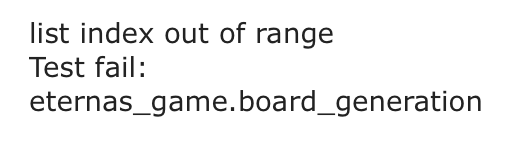

As it even do not run tests I provide the error to Gemini to give another chance and it provides me this code:

In [29]:
def board_generation_by_parts(max_balls=32) -> list[list]:
  """
  Generates a game board of 16 x 4 size with a maximum number of balls.

  Args:
      max_balls (int, optional): The maximum number of balls to place on the board. Defaults to 32.

  Returns:
      list[list]: A list representing the game board.
  """
  board = [[0 for _ in range(4)] for _ in range(16)]

  balls_count = random.randint(0, max_balls)
  ball_color = 'w'
  while balls_count != 0:
    placed_ball = False
    for pos in range(15, -1, -1):  # Check all columns from right to left
      for ball_pos in range(3, -1, -1):  # Check from bottom to top for first empty slot
        if board[pos][ball_pos] == 0:
          board[pos][ball_pos] = ball_color
          balls_count -= 1
          placed_ball = True
          if balls_count == 0 or winning_combination_by_parts(board):
            return board
          break  # Exit inner loop after placing a ball
      if placed_ball:
        break  # Exit outer loop if a ball was placed in this iteration
    if not placed_ball and balls_count > 0:  # No balls placed, but balls remaining (all columns full)
        balls_count = 0  # Adjust balls_count to signal the board is full

    ball_color = 'g' if ball_color == 'w' else 'w'

  return board


But it has the same results

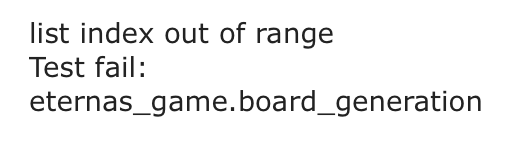

As Gemini was not able to correct it, I decided to reread our communication and find a source link that Gemini provided, so I take code there.

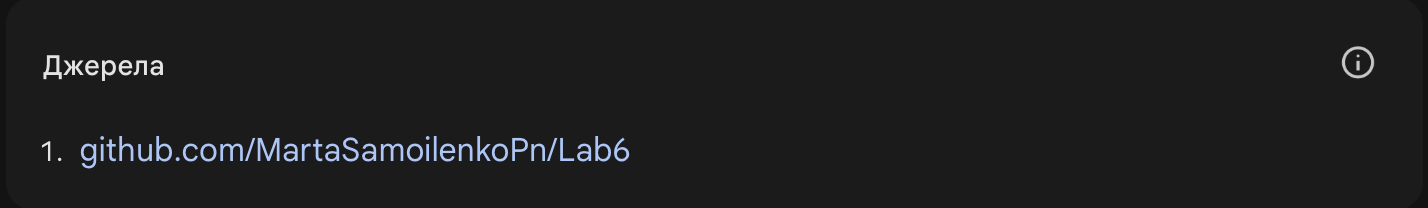

In [30]:
from typing import List
import random

def board_generation_github() -> List[list]:
    """
    Generates a game board of 16 x 4 size,
    i.e. two dimensional list (array) of 'g's,
    'w's and '0's  that is used for the game.

    ### 16 x 4 | g - green, w - white, 0 - whitespace

    e.g. [[0, 0, 0, 0], [0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 'g', 'g'],\
    [0, 'w', 'w', 'w'], [0, 0, 'w', 'g'], [0, 0, 0, 'g'], [0, 0, 'g', 'w'],\
    [0, 'g', 'g', 'w'], [0, 0, 0, 0], ['w', 'g', 'w', 'w'], [0, 0, 0, 'g'],\
    [0, 0, 0, 'g'], ['w', 'g', 'g', 'w'], [0, 'w', 'w', 'w'], [0, 0, 'g', 'w']]

    """
    ball_list = [0, 'w', 'g']
    board = []
    for _ in range(16):
        board.append([0,0,0,0])
    level = 3
    column = 0
    w_count = 16
    g_count = 16
    while column < 16:
        while level >= 0:
            if level == 3:
                index = random.randint(0,len(ball_list)-1)
                board[column][level] = ball_list[index]
            else:
                if board[column][level+1] == 0:
                    board[column][level+1] = 0
                else:
                    index = random.randint(0,len(ball_list)-1)
                    board[column][level] = ball_list[index]
            if board[column][level] == 'w':
                w_count -= 1
            elif board[column][level] == 'g':
                g_count -= 1

            if w_count == 0:
                try:
                    ball_list.remove('w')
                except ValueError:
                    pass
            if g_count == 0:
                try:
                    ball_list.remove('g')
                except ValueError:
                    pass
            level -= 1
        level = 3
        column += 1
    return board


def winning_combination_github(board: List[list]) -> bool:
    """
    (list) -> bool

    Checks for winning combinations on the board.
    Returns a bool value of True and all winning positions
    if there is winning combination or False if not.

    >>> winning_combination([[0, 'g', 'g', 'g'], \
[0, 'g', 'w', 'w'], [0, 0, 'g', 'g'],[0, 0, 0, 0], \
[0, 0, 0, 'g'], [0, 0, 'w', 'w'], ['g', 'g', 'g', 'w'], \
[0, 0, 0, 0], [0, 0, 'g', 'g'], [0, 'g', 'g', 'g'], \
['w', 'g', 'w', 'w'], [0, 'g', 'w', 'g'], [0, 0, 0, 0], \
[0, 0, 'g', 'g'], [0, 0, 0, 'w'], [0, 0, 'w', 'g']])
    False
    >>> winning_combination([[0, 'g', 'g', 'w'], [0, 0, 0, 0], [0, 0, 0, 0], \
['g', 'g', 'g', 'w'], [0, 0, 'w', 'g'], [0, 0, 'g', 'g'], \
[0, 0, 0, 'w'], ['w', 'g', 'g', 'g'], ['w', 'w', 'g', 'w'], \
[0, 0, 0, 'w'], [0, 'w', 'g', 'g'], [0, 0, 0, 0], [0, 0, 0, 0], \
[0, 'g', 'w', 'w'], [0, 0, 'w', 'g'], [0, 0, 'w', 'g']])
    False
    >>> winning_combination([['w', 'g', 'g', 'w'], [0, 0, 0, 0], \
[0, 'g', 'w', 'g'], ['g', 'w', 'w', 'w'], [0, 0, 0, 'g'], \
[0, 0, 0, 0], [0, 0, 0, 'w'], [0, 0, 0, 0], [0, 0, 'w', 'w'], \
['w', 'g', 'w', 'g'], [0, 0, 0, 'w'], [0, 0, 0, 'g'], \
[0, 0, 'g', 'w'], [0, 0, 0, 'w'], [0, 0, 'g', 'g'], \
[0, 0, 0, 'g']])
    False
    >>> winning_combination([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 'w', 'g'], \
[0, 0, 0, 'g'], ['g', 'g', 'g', 'w'], [0, 0, 'g', 'w'], \
[0, 0, 0, 'w'], ['w', 'g', 'w', 'g'], [0, 0, 'w', 'w'], \
[0, 'w', 'w', 'g'], ['g', 'w', 'g', 'g'], [0, 0, 0, 0], \
[0, 0, 0, 'w'], [0, 0, 'w', 'g'], [0, 0, 0, 'g'], \
[0, 0, 0, 'w']])
    False
    >>> winning_combination([[0, 'g', 'g', 'w'], \
[0, 0, 'w', 'g'], ['g', 'g', 'w', 'g'], [0, 0, 0, 'w'], \
[0, 0, 0, 'w'], ['w', 'g', 'w', 'w'], [0, 'w', 'g', 'g'], \
[0, 0, 0, 'w'], [0, 0, 0, 'w'], [0, 0, 0, 'w'], \
['w', 'g', 'w', 'w'], [0, 0, 0, 0], [0, 0, 0, 0], \
['g', 'w', 'g', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 'g']])
    (True, [[(3, 7), (3, 8), (3, 9), (3, 10)]])
    >>> winning_combination([[0, 0, 'g', 'g'], [0, 0, 0, 'g'], \
[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 'g'], \
['w', 'w', 'g', 'g'], ['w', 'w', 'g', 'g'], ['w', 'g', 'g', 'w'], \
[0, 'g', 'w', 'g'], [0, 0, 0, 'g'], [0, 0, 0, 'g'], \
[0, 0, 0, 'g'], [0, 'g', 'w', 'w'], [0, 0, 0, 'w'], [0, 0, 'g', 'g']])
    (True, [[(3, 9), (3, 10), (3, 11), (3, 12)]])
    >>> winning_combination([['g', 'w', 'w', 'w'], [0, 'g', 'g', 'w'], \
[0, 0, 'w', 'w'], [0, 'g', 'w', 'w'], [0, 0, 0, 'g'], \
[0, 0, 0, 0], [0, 0, 'w', 'g'], [0, 0, 0, 'g'], \
[0, 0, 0, 0], [0, 'w', 'w', 'w'], ['w', 'w', 'w', 'g'], \
[0, 0, 0, 0], [0, 0, 0, 'g'], [0, 0, 'g', 'g'], \
['g', 'w', 'w', 'w'], [0, 0, 'g', 'w']])
    (True, [[(3, 0), (3, 1), (3, 2), (3, 3)], \
[(3, 14), (3, 15), (3, 0), (3, 1)], \
[(3, 15), (3, 0), (3, 1), (3, 2)]])
    """
    result_list =[]
    for i in range(16):
        for j in range(4):
            row_index1 = i
            row_index2 = (i+1) % 16
            row_index3 = (i+2) % 16
            row_index4 = (i+3) % 16
            if board[i][j] != 0:
                if j == 0:
                    if board[i][j] == board[i][j+1] == board[i][j+2] == board[i][j+3]:
                        result_list.append([(j, i), (j+1, i), (j+2, i), (j+3, i)])
                    if board[row_index1][j] == board[row_index2][j+1] \
                        == board[row_index3][j+2] == board[row_index4][j+3]:
                        result_list.append([(j,row_index1), (j+1,row_index2), \
                            (j+2, row_index3), (j+3, row_index4)])
                elif j == 3:
                    if board[row_index1][j] == board[row_index2][j-1] \
                        == board[row_index3][j-2] == board[row_index4][j-3]:
                        result_list.append([(j, row_index1), (j-1, row_index2), \
                            (j-2, row_index3), (j-3, row_index4)])
                if board[row_index1][j] == board[row_index2][j] == \
                    board[row_index3][j] == board[row_index4][j]:
                    result_list.append([(j, row_index1), (j,row_index2), \
                            (j,row_index3), (j,row_index4)])
    if len(result_list) > 0:
        return (True, result_list)
    return False        


It fails only 2 tests but I want to remind that Gemini find this code but not write it.

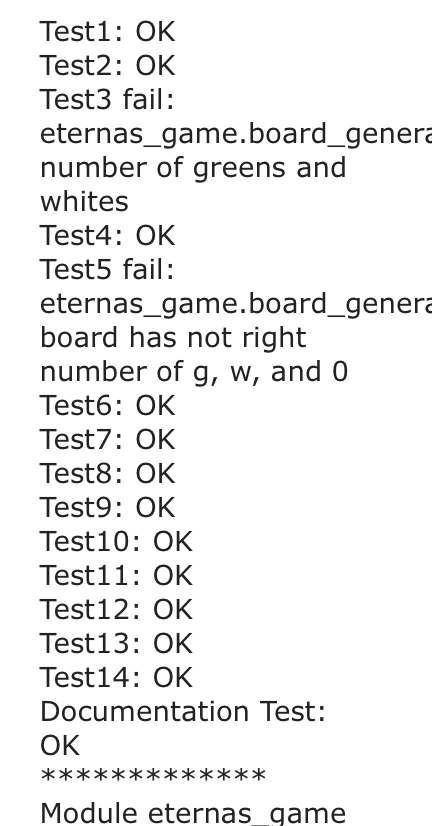

And now I want to compare the time of running codes (only my and code that I get after request of optimizing full code as code by functions does not work) and code from GitHub.

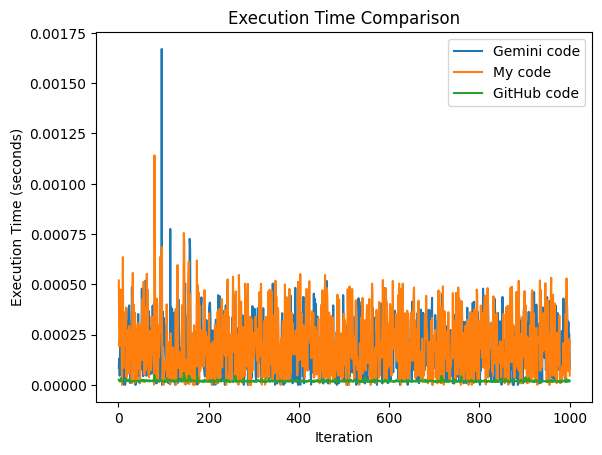

In [31]:
import time
import matplotlib.pyplot as plt

# Initialize lists to store execution times
execution_times_chatgpt = []
execution_times_your_code = []
execution_times_github = []

for _ in range(1000):
    # Measure time for ChatGPT code
    start_time = time.time()
    board_generation_gemini()
    end_time = time.time()
    execution_time_chatgpt = end_time - start_time
    execution_times_chatgpt.append(execution_time_chatgpt)

    # Measure time for your code
    start_time = time.time()
    board_generation()
    end_time = time.time()
    execution_time_your_code = end_time - start_time
    execution_times_your_code.append(execution_time_your_code)

    start_time = time.time()
    board_generation_github()
    end_time = time.time()
    execution_time_github = end_time - start_time
    execution_times_github.append(execution_time_github)

# Plotting the graph
plt.plot(range(1, 1001), execution_times_chatgpt, label='Gemini code')
plt.plot(range(1, 1001), execution_times_your_code, label='My code')
plt.plot(range(1, 1001), execution_times_github, label='GitHub code')
plt.xlabel('Iteration')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison')
plt.legend()
plt.show()
